# Hackathon at Semana Franco-Mexicana de IA

This notebook is intended to give a starting point for your own work, either in data storytelling or prediction. You can use this notebook from Gooogle Colab or locally in a jupyter server.

## Instructions for Google Colab

First, download the github repository. Only execute these lines **once**:

In [2]:
!git clone https://github.com/jbhayet/semanaia-hackathon/

Cloning into 'semanaia-hackathon'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 13 (delta 4), pack-reused 166 (from 1)
Receiving objects: 100% (188/188), 61.02 MiB | 14.95 MiB/s, done.
Resolving deltas: 100% (98/98), done.
Updating files: 100% (30/30), done.


In [3]:
%cd semanaia-hackathon

/content/semanaia-hackathon


On Colab, you should have all of the necessary python packages already installed, so you can go directly to the "Loading the data" section.

## Instructions for local utilisation

To run this notebook locally, you should first download the repository through the Github interface or by doing the following in a shell like [bash for Linux](https://ubuntu.com/tutorials/command-line-for-beginners#1-overview) or [git for Windows](https://gitforwindows.org/):

```bash
git clone https://github.com/jbhayet/semanaia-hackathon/
cd semania-hackathon
```

Then you will need to install the python libraries for this repository. If you don't have a python environment installed, you can use [anaconda](https://www.anaconda.com/) to create one. Once you are in a python environment, you can install the libraries of this repository by doing:

```bash
pip install --upgrade pip
pip install -r requirements.txt
```

## Loading the data

We will first load some of the python packages we will use in this notebook. If this line doesn't work (it outputs an error), go back to one of the previous steps.

In [4]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

Once the repository is downloaded and the python environment installed, you should load the data and check that it is valid. We will start with the training data from Mexico City:

In [5]:
cdmx_file = 'data/cdmx_data_series.csv'
print(f"--- Reading train data from {cdmx_file}")
data_cdmx = pd.read_csv(cdmx_file)
print(f"--- Read {len(data_cdmx)} records")

--- Reading train data from data/cdmx_data_series.csv
--- Read 518930 records


We will look at the first few rows of the data in order to validate that they were properly loaded:

In [6]:
data_cdmx.head()

,lon,lat,zone_id,tmin,tmax,prcp,wspd,weekday,holiday,occupation_0,...,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,occupation_21,occupation_22,occupation_23
0,-99.159,19.367,17,11.9,25.7,0.0,5.1,5,1,0,...,0.211,0.105,0.053,0.000,-0.053,-0.053,-0.053,-0.105,0.000,0.000
1,-99.159,19.367,17,11.8,25.8,0.0,8.6,6,0,0,...,-0.211,-0.211,0.000,-0.158,-0.105,-0.053,-0.316,-0.053,-0.316,-0.263
2,-99.159,19.367,17,9.8,22.6,0.0,6.4,0,0,0,...,0.000,-0.053,-0.158,0.105,0.211,0.158,0.263,0.684,0.737,0.895
3,-99.159,19.367,17,11.8,25.6,0.0,4.1,1,0,0,...,0.053,-0.368,-0.211,-0.421,-0.421,-0.368,-0.737,-0.737,-0.421,-0.526
4,-99.159,19.367,17,12.5,26.2,0.0,5.0,2,0,0,...,-0.526,-1.000,-0.895,-0.947,-0.789,-0.895,-1.158,-0.947,-0.789,-0.684


Now we will load the data from Lyon in the same way:

In [7]:
lyon_file = 'data/lyon_data_series.csv'
print(f"--- Reading train data from {lyon_file}")
data_lyon = pd.read_csv(lyon_file)
print(f"--- Read {len(data_lyon)} records")

--- Reading train data from data/lyon_data_series.csv
--- Read 339218 records


In [8]:
data_lyon.head()

,zone_id,lon,lat,tmin,tmax,prcp,wspd,weekday,holiday,occupation_0,...,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,occupation_21,occupation_22,occupation_23
0,3,4.885,45.805,-2.2,10.1,0.0,3.3,6,0,0.0,...,-0.250,-0.250,-0.250,-0.250,-0.192,-0.167,-0.167,-0.167,-0.167,-0.192
1,4,4.779,45.775,17.0,29.0,0.0,9.4,4,0,0.0,...,0.000,0.033,0.083,0.067,0.000,0.000,0.000,0.000,0.000,0.000
2,9,4.860,45.742,-0.4,10.7,0.0,2.9,1,0,0.0,...,-0.065,-0.055,-0.075,0.050,0.205,0.410,0.290,0.120,0.130,0.085
3,13,4.835,45.735,12.3,19.5,5.2,13.7,0,0,0.0,...,-0.165,-0.300,-0.424,-0.556,-0.565,-0.621,-0.624,-0.603,-0.576,-0.671
4,18,4.886,45.741,17.8,26.6,0.0,13.4,0,0,0.0,...,0.079,-0.100,-0.105,-0.100,-0.089,-0.053,-0.053,-0.021,-0.037,0.000


As you can see, there is a different amount of data for Lyon and Mexico City, but they have the same fields. Your task is to explore or predict the different levels of station usage, which are represented as relative values from midnight each day in the `occupation_x` columns, where `x` is the hour. Depending on if you want to work on data storytelling or prediction, you can use the following sections as starting points.

## Data Storytelling

Data Storytelling is about understanding the data through visualizations and analysis. What trends do you see in the data? How can they be used to inform a decision? Are any of the data suspect or not complete? How could the dataset be improved? All of these questions can be answered through a full understanding of the data. Here is an example visualization to start with. This visualization shows the average value of occupation per hour, each day of the week in Lyon. Can you change this code to make the same visualization for Mexico City?

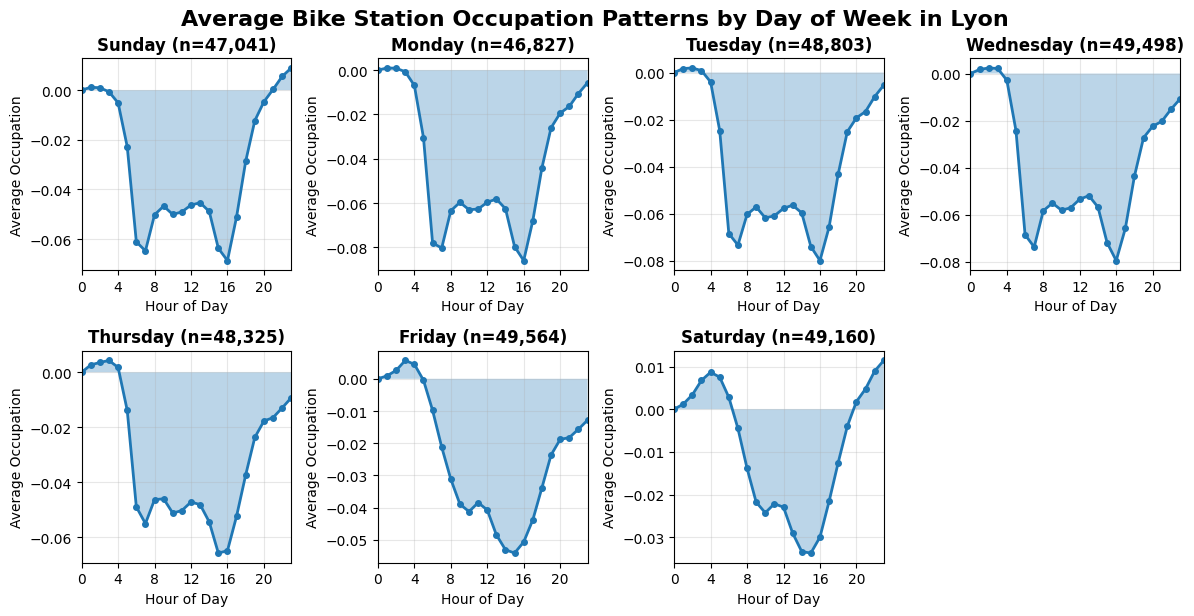

In [9]:
import seaborn as sns

# Define day names for better labels
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2x4 grid for 7 days + 1 empty
axes = axes.flatten()  # Flatten for easier indexing

# Hide the 8th subplot since we only have 7 days
axes[7].set_visible(False)

# Create occupation columns list
occupation_cols = [f'occupation_{i}' for i in range(24)]

# Process each day of the week
for day in range(7):
    # Filter data for this specific weekday
    day_data = data_lyon[data_lyon['weekday'] == day]

    if len(day_data) == 0:
        axes[day].text(0.5, 0.5, f'No data for {day_names[day]}',
                      ha='center', va='center', transform=axes[day].transAxes)
        axes[day].set_title(f'{day_names[day]} (No Data)')
        continue

    # Calculate average occupation for each hour
    hourly_avg = day_data[occupation_cols].mean()

    # Create the plot
    hours = range(24)
    axes[day].plot(hours, hourly_avg.values, marker='o', linewidth=2, markersize=4)
    axes[day].set_title(f'{day_names[day]} (n={len(day_data):,})', fontsize=12, fontweight='bold')
    axes[day].set_xlabel('Hour of Day')
    axes[day].set_ylabel('Average Occupation')
    axes[day].grid(True, alpha=0.3)
    axes[day].set_xlim(0, 23)
    axes[day].set_xticks(range(0, 24, 4))  # Show every 4 hours

    # Add some styling
    axes[day].fill_between(hours, hourly_avg.values, alpha=0.3)

plt.tight_layout()
plt.suptitle('Average Bike Station Occupation Patterns by Day of Week in Lyon',
              fontsize=16, fontweight='bold', y=1.02);

To go further, look at the `generate_zones.py` notebook, which loads the geographic data. The different areas have very different bike uses, so visualizing these data on a map can give much better understanding.

## Prediction

For the prediction task, we

In [10]:
current_hour = 15
df = data_lyon

# Define features: static info + weather + previous occupation levels
feature_cols = [
    'lon', 'lat', 'zone_id',           # Location features
    'tmin', 'tmax', 'prcp', 'wspd',    # Weather features
    'weekday', 'holiday'               # Time features
]

# Add previous occupation levels (from hour 0 to current_hour)
prev_occupation_cols = [f'occupation_{i}' for i in range(current_hour + 1)]
feature_cols.extend(prev_occupation_cols)

# Target: next 3 hours of occupation
target_cols = [f'occupation_{current_hour + i}' for i in range(1, 4)]

# Create feature matrix and target matrix
X = df[feature_cols].copy()
y = df[target_cols].copy()

# Add hour of day as feature
X['current_hour'] = current_hour

print(f"Dataset shape: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Predicting hours {current_hour+1}, {current_hour+2}, {current_hour+3}")

Dataset shape: 339218 samples, 26 features
Predicting hours 16, 17, 18


We will separate the data into two parts: a training dataset to train the model, and a test dataset to evaluate the model.

In [11]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training dataset shape: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test dataset shape: {X_test.shape[0]} samples, {X_test.shape[1]} features")

Training dataset shape: 271374 samples, 26 features
Test dataset shape: 67844 samples, 26 features


Now that we have defined our input data `X` and our target `y`, and split them into training and test data, we can train a machine learning model on the training data to predict the target.

In [12]:
# Train model (MultiOutputRegressor handles multiple targets)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=10,
        max_depth=3,
        random_state=42,
        n_jobs=-1
    )
)

print("Training model...")
model.fit(X_train, y_train)

Training model...


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=3,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=42))

Finally, we will evaluate the model on the test data. Here we evaluate the model using the Mean Absolute Error and the R2 score.

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Absolute Error: 0.1482
R² Score: 0.6481


To go further, apply your model to the data in Mexico City. Does it work as well? Then, consider your prediciton model's data. Does it work for hours besides 3pm? Try training it so that it can predict any 3 hour period, not just from 3pm.

México Storytelling

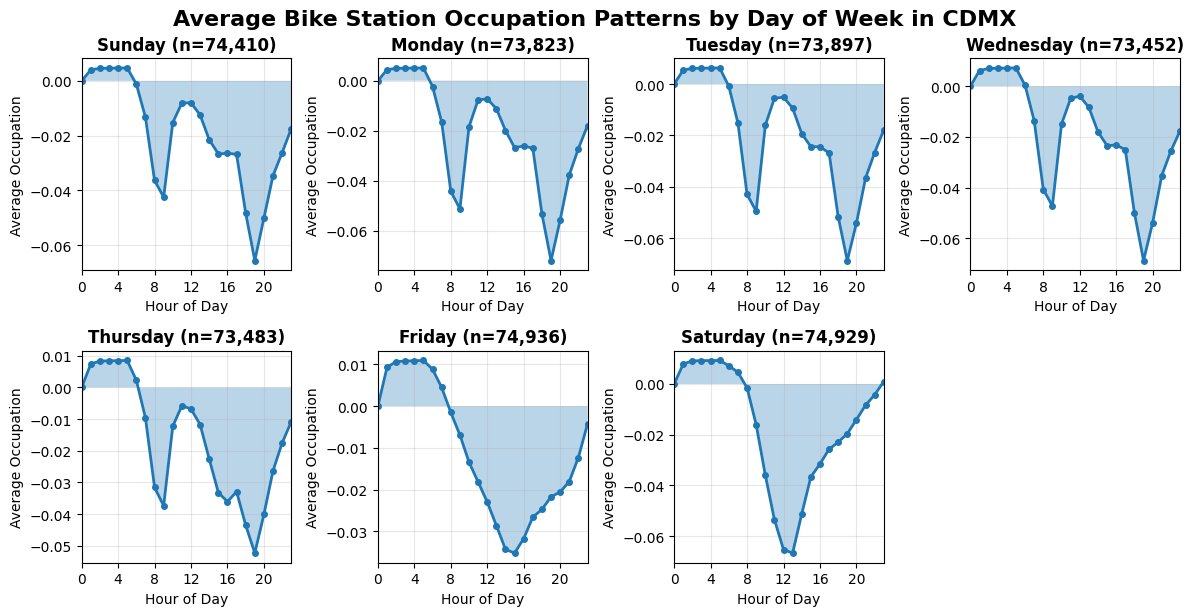

In [14]:
import seaborn as sns

# Define day names for better labels
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2x4 grid for 7 days + 1 empty
axes = axes.flatten()  # Flatten for easier indexing

# Hide the 8th subplot since we only have 7 days
axes[7].set_visible(False)

# Create occupation columns list
occupation_cols = [f'occupation_{i}' for i in range(24)]

# Process each day of the week
for day in range(7):
    # Filter data for this specific weekday
    day_data = data_cdmx[data_cdmx['weekday'] == day]

    if len(day_data) == 0:
        axes[day].text(0.5, 0.5, f'No data for {day_names[day]}',
                      ha='center', va='center', transform=axes[day].transAxes)
        axes[day].set_title(f'{day_names[day]} (No Data)')
        continue

    # Calculate average occupation for each hour
    hourly_avg = day_data[occupation_cols].mean()

    # Create the plot
    hours = range(24)
    axes[day].plot(hours, hourly_avg.values, marker='o', linewidth=2, markersize=4)
    axes[day].set_title(f'{day_names[day]} (n={len(day_data):,})', fontsize=12, fontweight='bold')
    axes[day].set_xlabel('Hour of Day')
    axes[day].set_ylabel('Average Occupation')
    axes[day].grid(True, alpha=0.3)
    axes[day].set_xlim(0, 23)
    axes[day].set_xticks(range(0, 24, 4))  # Show every 4 hours

    # Add some styling
    axes[day].fill_between(hours, hourly_avg.values, alpha=0.3)

plt.tight_layout()
plt.suptitle('Average Bike Station Occupation Patterns by Day of Week in CDMX',
              fontsize=16, fontweight='bold', y=1.02);

México Prediction

In [15]:
current_hour = 15
df = data_cdmx

# Define features: static info + weather + previous occupation levels
feature_cols = [
    'lon', 'lat', 'zone_id',           # Location features
    'tmin', 'tmax', 'prcp', 'wspd',    # Weather features
    'weekday', 'holiday'               # Time features
]

# Add previous occupation levels (from hour 0 to current_hour)
prev_occupation_cols = [f'occupation_{i}' for i in range(current_hour + 1)]
feature_cols.extend(prev_occupation_cols)

# Target: next 3 hours of occupation
target_cols = [f'occupation_{current_hour + i}' for i in range(1, 4)]

# Create feature matrix and target matrix
X = df[feature_cols].copy()
y = df[target_cols].copy()

# Add hour of day as feature
X['current_hour'] = current_hour

print(f"Dataset shape: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Predicting hours {current_hour+1}, {current_hour+2}, {current_hour+3}")

Dataset shape: 518930 samples, 26 features
Predicting hours 16, 17, 18


Training dataset

In [16]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training dataset shape: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test dataset shape: {X_test.shape[0]} samples, {X_test.shape[1]} features")

Training dataset shape: 415144 samples, 26 features
Test dataset shape: 103786 samples, 26 features


Train model (MultiOutputRegressor handles multiple targets)

In [17]:
# Train model (MultiOutputRegressor handles multiple targets)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=10,
        max_depth=3,
        random_state=42,
        n_jobs=-1
    )
)

print("Training model...")
model.fit(X_train, y_train)

Training model...


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=3,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=42))

Evaluating Model

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Absolute Error: 0.2039
R² Score: 0.8050


Holiday

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


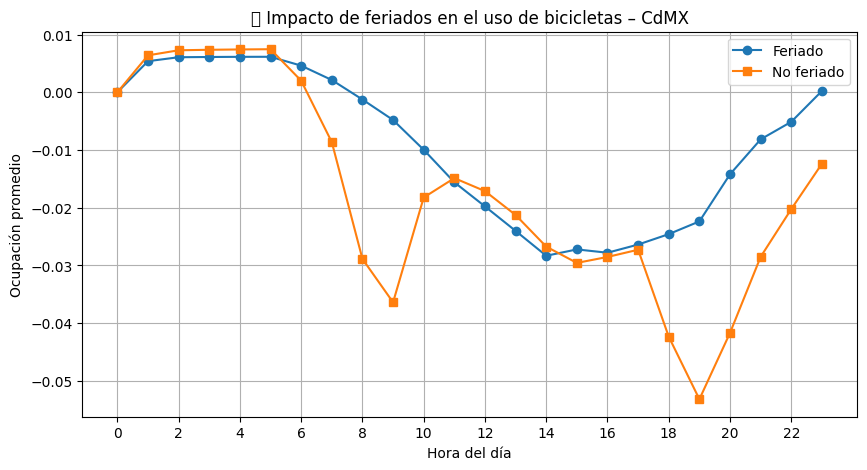

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


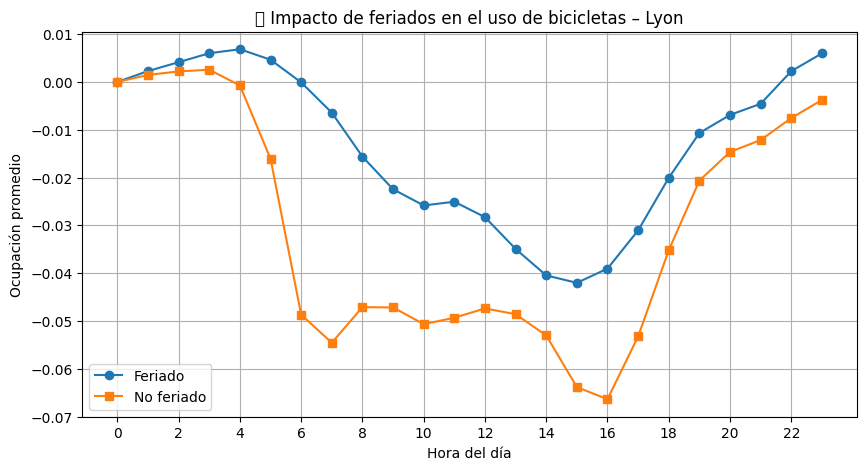

In [19]:
def plot_holiday_vs_regular(data, city_name):
    occupation_cols = [f'occupation_{i}' for i in range(24)]

    holiday = data[data['holiday'] == 1][occupation_cols].mean()
    non_holiday = data[data['holiday'] == 0][occupation_cols].mean()

    plt.figure(figsize=(10, 5))
    plt.plot(range(24), holiday, label='Feriado', marker='o')
    plt.plot(range(24), non_holiday, label='No feriado', marker='s')
    plt.title(f'🎉 Impacto de feriados en el uso de bicicletas – {city_name}')
    plt.xlabel('Hora del día')
    plt.ylabel('Ocupación promedio')
    plt.xticks(range(0, 24, 2))
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar
plot_holiday_vs_regular(data_cdmx, "CdMX")
plot_holiday_vs_regular(data_lyon, "Lyon")


Weather

<ipython-input-20-f1fbc028596f>:17: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-f1fbc028596f>:17: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


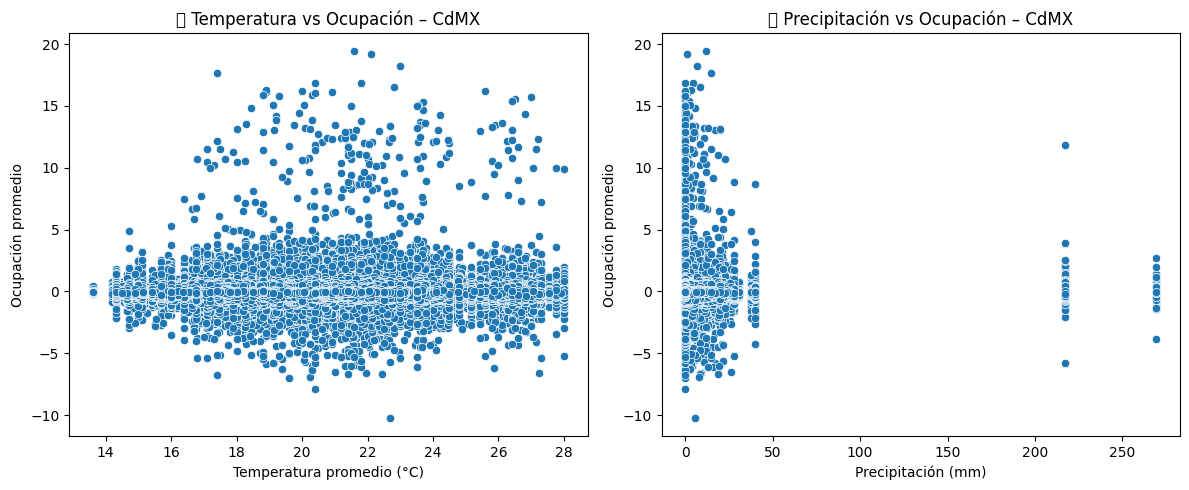

<ipython-input-20-f1fbc028596f>:17: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-20-f1fbc028596f>:17: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


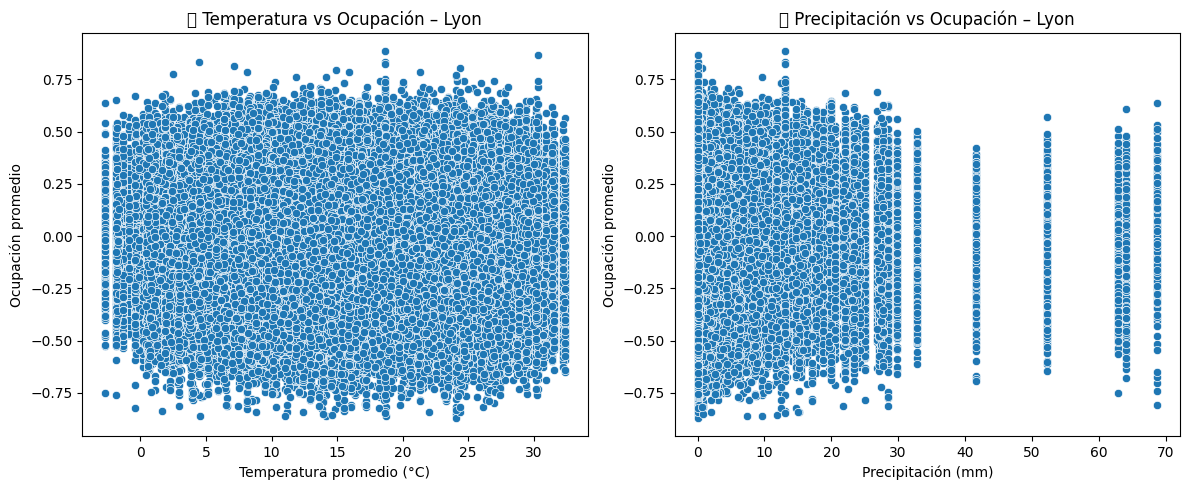

In [20]:
def weather_impact_scatter(data, city_name):
    data['avg_temp'] = (data['tmin'] + data['tmax']) / 2
    data['avg_occupation'] = data[[f'occupation_{i}' for i in range(24)]].mean(axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    sns.scatterplot(x='avg_temp', y='avg_occupation', data=data, ax=axs[0])
    axs[0].set_title(f'🌡️ Temperatura vs Ocupación – {city_name}')
    axs[0].set_xlabel('Temperatura promedio (°C)')
    axs[0].set_ylabel('Ocupación promedio')

    sns.scatterplot(x='prcp', y='avg_occupation', data=data, ax=axs[1])
    axs[1].set_title(f'🌧️ Precipitación vs Ocupación – {city_name}')
    axs[1].set_xlabel('Precipitación (mm)')
    axs[1].set_ylabel('Ocupación promedio')

    plt.tight_layout()
    plt.show()

# Aplicar
weather_impact_scatter(data_cdmx, "CdMX")
weather_impact_scatter(data_lyon, "Lyon")


Stations

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


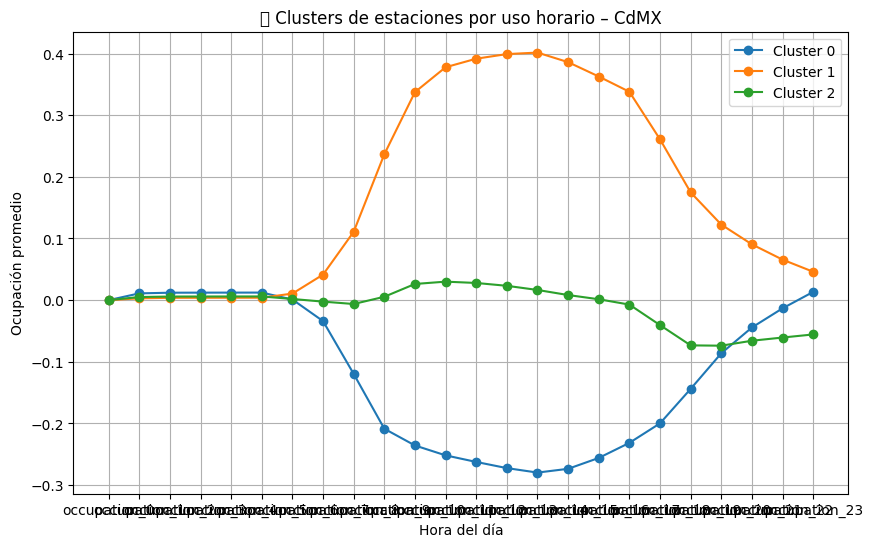

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


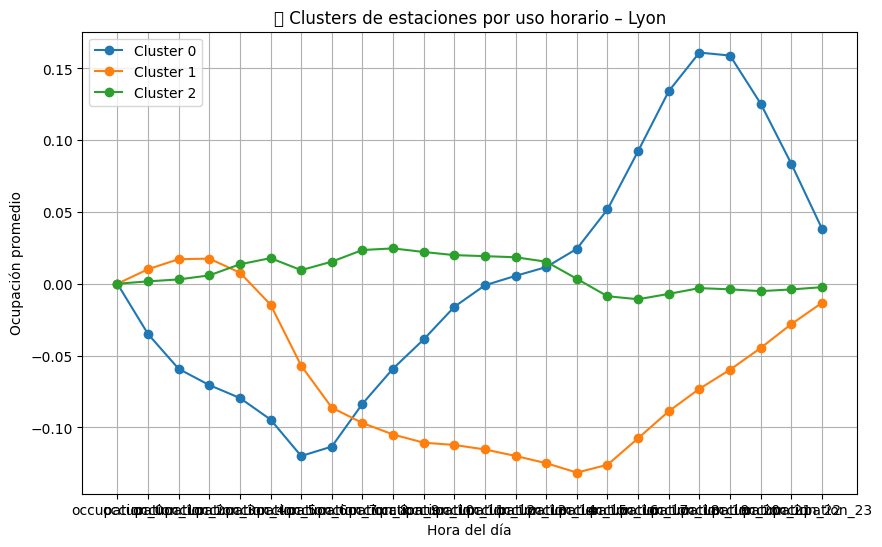

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster_stations(data, city_name, n_clusters=3):
    # Calcular la ocupación media por hora para cada estación
    occupation_cols = [f'occupation_{i}' for i in range(24)]
    station_profiles = data.groupby('zone_id')[occupation_cols].mean()

    # Normalizamos para comparar perfiles en forma, no en cantidad
    scaler = StandardScaler()
    station_scaled = scaler.fit_transform(station_profiles)

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(station_scaled)

    station_profiles['Cluster'] = labels

    # Visualizar clusters promedio
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        profile = station_profiles[station_profiles['Cluster'] == cluster][occupation_cols].mean()
        plt.plot(profile, label=f'Cluster {cluster}', marker='o')

    plt.title(f'🏙️ Clusters de estaciones por uso horario – {city_name}')
    plt.xlabel('Hora del día')
    plt.ylabel('Ocupación promedio')
    plt.legend()
    plt.grid(True)
    plt.show()

    return station_profiles.reset_index()

# Aplicar para ambas ciudades
clusters_cdmx = cluster_stations(data_cdmx, "CdMX")
clusters_lyon = cluster_stations(data_lyon, "Lyon")


Zonas

In [22]:
def infer_zone_from_cluster(clustered_df):
    def label_zone(row):
        peak_hour = row[[f'occupation_{i}' for i in range(24)]].values.argmax()
        if peak_hour < 9:
            return '🏠 Residencial'
        elif 9 <= peak_hour <= 17:
            return '🏢 Laboral'
        else:
            return '🎡 Recreativa/Turística'

    clustered_df['Zona estimada'] = clustered_df.apply(label_zone, axis=1)
    return clustered_df

clusters_cdmx = infer_zone_from_cluster(clusters_cdmx)
clusters_lyon = infer_zone_from_cluster(clusters_lyon)

clusters_cdmx[['zone_id', 'Cluster', 'Zona estimada']].head()


,zone_id,Cluster,Zona estimada
0,0,0,🎡 Recreativa/Turística
1,1,0,🏠 Residencial
2,2,1,🏢 Laboral
3,3,2,🏠 Residencial
4,4,2,🏠 Residencial


Predicción

In [24]:
station_id = data_cdmx['zone_id'].value_counts().idxmax()  # Estación con más registros
station_df = data_cdmx[data_cdmx['zone_id'] == station_id].copy()
station_df['timestamp'] = pd.to_datetime(station_df['timestamp'])
station_df.set_index('timestamp', inplace=True)
station_df = station_df.resample('H').mean().fillna(method='ffill')  # Ocupación por hora

# Visualizamos
station_df['occupation'].plot(figsize=(14, 4), title=f'Ocupación histórica – Estación {station_id}')
plt.ylabel("Ocupación promedio")
plt.show()


KeyError: 'timestamp'

In [25]:
def create_sequences(data, window_size=24):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])  # predicción a +1 hora
    return np.array(X), np.array(y)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(station_df[['occupation']].values)

window_size = 24
X_seq, y_seq = create_sequences(scaled_data, window_size)

# Dividimos en train/test
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


KeyError: "None of [Index(['occupation'], dtype='object')] are in the [columns]"

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(window_size, 1), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


NameError: name 'window_size' is not defined

In [29]:
preds = model.predict(X_test)
preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Real')
plt.plot(preds_inv, label='Predicción')
plt.legend()
plt.title(f"📈 Predicción de ocupación – Estación {station_id}")
plt.show()


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
def create_multistep_sequences(data, window_size=24, horizon=6):
    X, y = [], []
    for i in range(len(data) - window_size - horizon):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + horizon])
    return np.array(X), np.array(y)


In [31]:
horizon = 6  # puedes cambiar a 12 u otra
X_seq, y_seq = create_multistep_sequences(scaled_data, window_size=24, horizon=horizon)

split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


NameError: name 'scaled_data' is not defined

In [32]:
model = Sequential([
    LSTM(64, input_shape=(window_size, 1), return_sequences=False),
    Dense(horizon)  # Salida de 6 predicciones: próxima hora, +2h, ..., +6h
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test))


NameError: name 'window_size' is not defined

In [33]:
preds = model.predict(X_test)
preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test)

# Visualizamos predicción vs real para los primeros 72 bloques (3 días)
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv[:72, 0], label='Real h+1')
plt.plot(preds_inv[:72, 0], label='Predicción h+1')
plt.plot(preds_inv[:72, 1], label='Predicción h+2', linestyle='--')
plt.plot(preds_inv[:72, -1], label=f'Predicción h+{horizon}', linestyle=':')
plt.title(f'Predicción de ocupación para {horizon} horas – Estación {station_id}')
plt.legend()
plt.show()


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [34]:
df = df_station.copy()
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['week'] = df['timestamp'].dt.isocalendar().week.astype(int)
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
df['day'] = df['timestamp'].dt.day


NameError: name 'df_station' is not defined

In [35]:
df['ocupacion_lag1'] = df.groupby('station_id')['ocupacion'].shift(1)
df['ocupacion_lag24'] = df.groupby('station_id')['ocupacion'].shift(24)  # mismo hora día anterior


KeyError: 'station_id'

In [36]:
df = df.dropna()


In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X_cols = ['hour', 'dayofweek', 'month', 'week', 'is_weekend', 'ocupacion_lag1', 'ocupacion_lag24']
models = {}
predictions = []

for station_id in df['station_id'].unique():
    df_s = df[df['station_id'] == station_id]
    X = df_s[X_cols]
    y = df_s['ocupacion']

    split = int(len(df_s) * 0.8)
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
    model.fit(X_train, y_train)
    models[station_id] = model

    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Estación {station_id} – RMSE: {rmse:.2f}")

    # Guardamos predicción para visualización
    df_s_test = df_s.iloc[split:].copy()
    df_s_test['pred_ocupacion'] = y_pred
    predictions.append(df_s_test)


KeyError: 'station_id'

In [38]:
df_pred = pd.concat(predictions)


ValueError: No objects to concatenate

In [39]:
import folium
from folium.plugins import TimestampedGeoJson

# Simulamos coordenadas de estaciones si no las tienes:
stations_coord = {
    s: (19.43 + 0.01 * i, -99.13 + 0.01 * i)
    for i, s in enumerate(df_pred['station_id'].unique())
}

hour_to_plot = 8  # hora del día a visualizar
df_hour = df_pred[df_pred['hour'] == hour_to_plot]

m = folium.Map(location=[19.43, -99.13], zoom_start=13)

for _, row in df_hour.iterrows():
    lat, lon = stations_coord[row['station_id']]
    folium.CircleMarker(
        location=(lat, lon),
        radius=7,
        fill=True,
        fill_opacity=0.7,
        popup=f"Estación {row['station_id']}\nPredicción: {row['pred_ocupacion']:.1f}",
        color="green" if row['pred_ocupacion'] > 10 else "orange" if row['pred_ocupacion'] > 3 else "red"
    ).add_to(m)

m


NameError: name 'df_pred' is not defined

In [40]:
from folium.plugins import TimestampedGeoJson
import json

# Nos quedamos con las columnas necesarias
df_geo = df_pred[['timestamp', 'station_id', 'pred_ocupacion']].copy()

# Simulamos coordenadas si no las tienes
stations_coord = {
    s: (19.43 + 0.01 * i, -99.13 + 0.01 * i)
    for i, s in enumerate(df_geo['station_id'].unique())
}

# Convertimos cada fila en un "Feature" GeoJSON
features = []

for _, row in df_geo.iterrows():
    lat, lon = stations_coord[row['station_id']]
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [lon, lat]
        },
        'properties': {
            'time': row['timestamp'].strftime("%Y-%m-%dT%H:%M:%S"),
            'style': {
                'color': 'green' if row['pred_ocupacion'] > 10 else 'orange' if row['pred_ocupacion'] > 3 else 'red',
                'fillOpacity': 0.7,
                'radius': min(max(row['pred_ocupacion'], 3), 15)
            },
            'popup': f"Estación {row['station_id']}<br>Ocupación estimada: {row['pred_ocupacion']:.1f}"
        }
    }
    features.append(feature)

geojson = {
    'type': 'FeatureCollection',
    'features': features
}


NameError: name 'df_pred' is not defined

In [ ]:
import folium

m = folium.Map(location=[19.43, -99.13], zoom_start=13)

TimestampedGeoJson(
    data=geojson,
    transition_time=300,
    auto_play=False,
    loop=False,
    add_last_point=True
).add_to(m)

m


In [41]:
import streamlit as st
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson
from streamlit_folium import st_folium
import plotly.express as px
import base64
import json

# -------- Carga de datos --------
@st.cache_data
def load_data():
    df = pd.read_csv('predicciones_modelos.csv', parse_dates=['timestamp'])
    return df

df = load_data()

# -------- Sidebar --------
st.sidebar.title("🚲 Selector de Estación")
stations = df['station_id'].unique()
selected_station = st.sidebar.selectbox("Elige una estación", stations)

st.sidebar.title("📈 Comparar Modelos")
modelos = df['modelo'].unique()
selected_models = st.sidebar.multiselect("Modelos a comparar", modelos, default=modelos)

# -------- Filtrado --------
df_filtered = df[(df['station_id'] == selected_station) & (df['modelo'].isin(selected_models))]

# -------- Mapa animado --------
st.header("🗺️ Mapa animado por hora")

# Coordenadas simuladas (o reales si las tienes)
lat = 19.43 + int(selected_station) * 0.001
lon = -99.13 + int(selected_station) * 0.001

features = []

for _, row in df_filtered.iterrows():
    features.append({
        "type": "Feature",
        "geometry": {"type": "Point", "coordinates": [lon, lat]},
        "properties": {
            "time": row['timestamp'].strftime("%Y-%m-%dT%H:%M:%S"),
            "style": {
                "color": "green" if row['pred_ocupacion'] > 10 else "orange" if row['pred_ocupacion'] > 5 else "red",
                "fillOpacity": 0.6,
                "radius": min(max(row['pred_ocupacion'], 3), 15)
            },
            "popup": f"{row['modelo']}<br>Ocupación: {row['pred_ocupacion']:.1f}"
        }
    })

geojson = {"type": "FeatureCollection", "features": features}

m = folium.Map(location=[lat, lon], zoom_start=15)
TimestampedGeoJson(data=geojson, transition_time=500, auto_play=False).add_to(m)
st_data = st_folium(m, width=700)

# -------- Gráfico de comparación --------
st.header("📊 Comparación de predicciones por modelo")

fig = px.line(df_filtered, x='timestamp', y='pred_ocupacion', color='modelo',
              title=f'Predicción de ocupación - Estación {selected_station}')
st.plotly_chart(fig, use_container_width=True)

# -------- Exportación --------
st.subheader("📥 Descargar predicciones")

def get_csv_download_link(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()
    return f'<a href="data:file/csv;base64,{b64}" download="predicciones_filtradas.csv">Descargar CSV</a>'

st.markdown(get_csv_download_link(df_filtered), unsafe_allow_html=True)


ModuleNotFoundError: No module named 'streamlit'

In [42]:
# -------- Evaluación de modelos --------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

st.header("🧠 Métricas de Evaluación por Modelo")

# Asumimos que 'ocupacion_real' es la columna real si existe
if 'ocupacion_real' in df_filtered.columns:
    eval_data = []

    for modelo in selected_models:
        df_model = df_filtered[df_filtered['modelo'] == modelo]

        if not df_model.empty:
            mae = mean_absolute_error(df_model['ocupacion_real'], df_model['pred_ocupacion'])
            rmse = np.sqrt(mean_squared_error(df_model['ocupacion_real'], df_model['pred_ocupacion']))
            r2 = r2_score(df_model['ocupacion_real'], df_model['pred_ocupacion'])

            eval_data.append({
                'Modelo': modelo,
                'MAE': round(mae, 3),
                'RMSE': round(rmse, 3),
                'R²': round(r2, 3)
            })

    eval_df = pd.DataFrame(eval_data)

    st.dataframe(eval_df.set_index('Modelo'))

    fig_eval = px.bar(eval_df, x='Modelo', y=['MAE', 'RMSE', 'R²'],
                      barmode='group', title="Comparación de Métricas de Evaluación")
    st.plotly_chart(fig_eval, use_container_width=True)
else:
    st.warning("⚠️ No se encontró la columna 'ocupacion_real'. Las métricas de evaluación no están disponibles.")


NameError: name 'st' is not defined

In [44]:
pip install matplotlib_scalebar

In [45]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 37.4 MB/s eta 0:00:00


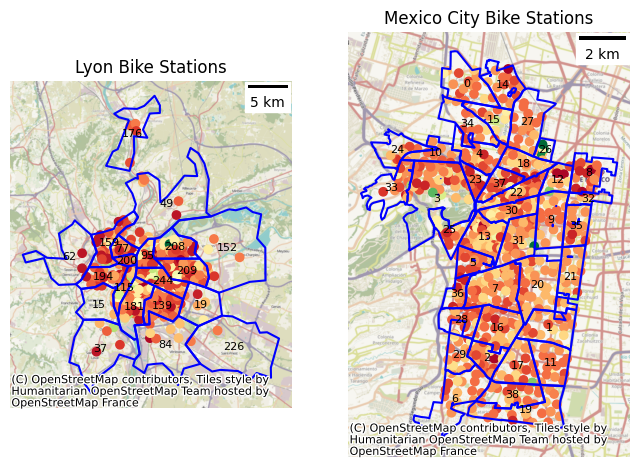

In [46]:
import pandas as pd # type: ignore
import geopandas as gpd # type: ignore
import contextily as ctx # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib_scalebar.scalebar import ScaleBar # type: ignore
import sys,ast,json

def string_to_dict(dict_string):
    # Convert to proper json format
    dicts = json.loads(dict_string)
    return dicts


##################################################################################################
# Read the Cdmx stations json
cdmx_stations = pd.read_json('data/cdmx_stations.json')
cdmx_stations = pd.DataFrame.from_records(cdmx_stations['data'].stations)
cdmx_stations = cdmx_stations.drop(columns=['name','rental_methods','short_name','eightd_has_key_dispenser','is_charging','has_kiosk','electric_bike_surcharge_waiver','external_id'])

# Create a DataFrame with a geometry containing the Points
geo_cdmx_stations = gpd.GeoDataFrame(
    cdmx_stations, crs="EPSG:4326", geometry=gpd.points_from_xy(cdmx_stations["lon"], cdmx_stations["lat"])
)
geo_cdmx_stations = geo_cdmx_stations.to_crs(epsg=3857)

# Read the GeoJSON file for Mexico City colonias
cdmx_zones_geo = gpd.read_file('data/cdmx_colonias.geojson')
cdmx_zones_data= pd.read_json('data/cdmx_colonias.geojson',encoding='iso-8859-1')
cdmx_zones_data["mun_name"]= cdmx_zones_data['features'].apply(lambda x: x['properties']['mun_name'])
cdmx_zones_data["name"]    = cdmx_zones_data['features'].apply(lambda x: x['properties']['col_name'])
cdmx_zones_data.drop(columns=['features'], inplace=True)
cdmx_zones_geo = cdmx_zones_geo.to_crs(epsg=3857)
cdmx_zones_data['n_bike_stations']= cdmx_zones_geo.apply(lambda x: geo_cdmx_stations.within(x.geometry).sum(), axis=1)
cdmx_zones_geo['n_bike_stations'] = cdmx_zones_geo.apply(lambda x: geo_cdmx_stations.within(x.geometry).sum(), axis=1)
cdmx_zones_data = cdmx_zones_data[cdmx_zones_data['n_bike_stations']>0]
cdmx_zones_geo  = cdmx_zones_geo[cdmx_zones_geo['n_bike_stations']>0]

# Merge the colonias that are too small
to_merges = [[762,1802,1225],[38,911,39,910,757],[478,1605,1800,1458,1799],[759,1527,1187],[1006,1609,1417,1464],[302,579,1804,488,1107,231],[89,637,481,1710,1222],[1224,1321,1322,1323],[47,1227,236],[477,1320,1530,1047,1459,1318],[244,1256,1011,823,1488,1490,1764],[1,241,1067,820,1015,3,119],[87,342,1319,1529,813],[758,1457,1707,1100],[343,432,1528,1801,1662],[40,1045,1412,1373],[344,1219,296,1661],[76,1028,139,731,942],[46,95,352,349],[580,581,1712],[347,1669,1415],[90,484,1105],[761,1416],[230,298,815,482],[477,1663],[88,1666,575],[1003,1607,1052,1106],[45,486,1050,913,1803,1670],[161,345,297,573],[402,1384,1750,1751,875,1346,1495],[578,1193,1463],[684,1220,1191,1226]]
for to_merge in to_merges:
    for i in range(1,len(to_merge)):
        # Merge two colonias
        cdmx_zones_geo.loc[to_merge[0],'geometry'] = cdmx_zones_geo.loc[to_merge[0],'geometry'].union(cdmx_zones_geo.loc[to_merge[i],'geometry'])
        # Drop the second colonia
        cdmx_zones_geo = cdmx_zones_geo.drop(index=to_merge[i])
        cdmx_zones_data = cdmx_zones_data.drop(index=to_merge[i])
cdmx_zones_data['n_bike_stations'] = cdmx_zones_geo.apply(lambda x: geo_cdmx_stations.within(x.geometry).sum(), axis=1)
cdmx_zones_geo.drop(columns=['n_bike_stations'], inplace=True)
cdmx_zones_data.reset_index(drop=True, inplace=True)
cdmx_zones_geo.reset_index(drop=True, inplace=True)
# Save the data to CSV and GeoJSON files
cdmx_zones_data.to_csv('data/cdmx_zones.csv')
cdmx_zones_geo.to_file('data/cdmx_zones_geo.geojson', driver='GeoJSON')

##################################################################################################
# Read the Lyon stations CSV
lyon_stations = pd.read_csv('data/lyon_stations.csv', index_col=0)
lyon_stations = lyon_stations.drop(columns=['adresse1','adresse2','code_insee','numdansarrondissement','stationbonus','achevement','validite','pole'])
lyon_stations['commune'] = lyon_stations['commune'].astype('category')
# Create a DataFrame with a geometry containing the Points
geo_lyon_stations = gpd.GeoDataFrame(
    lyon_stations, crs="EPSG:4326", geometry=gpd.points_from_xy(lyon_stations["lon"], lyon_stations["lat"])
)
geo_lyon_stations = geo_lyon_stations.to_crs(epsg=3857)
# Read the GeoJSON file for Lyon communes
lyon_communes = gpd.read_file('data/lyon_communes.geojson')
lyon_communes = lyon_communes.to_crs(epsg=3857)
lyon_communes['n_bike_stations'] = lyon_communes.apply(lambda x: geo_lyon_stations.within(x.geometry).sum(), axis=1)
lyon_communes = lyon_communes[lyon_communes['n_bike_stations']>0]
to_merges = [[84,273],[152,275],[176,201,198],[62,259],[49,252,185,220],[15,278],[37,158,153]]
for to_merge in to_merges:
    for i in range(1,len(to_merge)):
        # Merge two colonias
        lyon_communes.loc[to_merge[0],'geometry'] = lyon_communes.loc[to_merge[0],'geometry'].union(lyon_communes.loc[to_merge[i],'geometry'])
        # Drop the second colonia
        lyon_communes = lyon_communes.drop(index=to_merge[i])
# Villeurbanne is very large, so we will split it into two parts
# Determine the average point of the geometry
centroid = lyon_communes.loc[208,'geometry'].centroid
# Create a GeoDataframe with the sub-polygon above the line
from shapely.geometry import Polygon # type: ignore
polygon = lyon_communes.loc[208, 'geometry']
# Split the polygon by the infinite horizontal line passing through centroid
far = 1000000
up = polygon.intersection(Polygon([
        (polygon.bounds[0]-far, centroid.y),
        (centroid.x+far, centroid.y),
        (centroid.x+far, polygon.bounds[3]+far),
        (polygon.bounds[0]-far, polygon.bounds[3]+far)
    ]))
down = polygon.intersection(Polygon([
        (polygon.bounds[0]-far, centroid.y),
        (centroid.x+far, centroid.y),
        (centroid.x+far, polygon.bounds[1]-far),
        (polygon.bounds[0]-far, polygon.bounds[1]-far)
    ]))
# Replace the original geometry with the left part, and add the right part as a new row
lyon_communes.loc[208, 'geometry'] = up
# Change the commune name to Villeurbanne nord
lyon_communes.loc[209] = lyon_communes.loc[208]
lyon_communes.loc[209, 'geometry'] = down
lyon_communes.loc[208, 'nom'] = 'Villeurbanne nord'
lyon_communes.loc[209, 'nom'] = 'Villeurbanne sud'
lyon_communes['n_bike_stations'] = lyon_communes.apply(lambda x: geo_lyon_stations.within(x.geometry).sum(), axis=1)
# Save the data to CSV files
lyon_communes.to_csv('data/lyon_zones.csv', index=False)


##################################################################################################
# Plotting the data
# Create a figure with two subplots
fig, ax = plt.subplots(1,2,figsize=(8, 6))

# Plotting the Lyon data
ax[0].set_title('Lyon Bike Stations')
# Plot the stations in Lyon
geo_lyon_stations.plot("nbbornettes", cmap="RdYlGn", ax=ax[0])
# Plot the Lyon communes
lyon_communes.boundary.plot(ax=ax[0], color='blue')
# Plot the communes ids too
lyon_communes.index.to_series().apply(lambda x: ax[0].text(lyon_communes.loc[x,'geometry'].centroid.x, lyon_communes.loc[x,'geometry'].centroid.y, x, fontsize=8, ha='center', va='center', color='black'))
ax[0].set_axis_off()
ax[0].add_artist(ScaleBar(1))
ctx.add_basemap(ax[0])

# Plotting the Mexico City data
ax[1].set_title('Mexico City Bike Stations')
# Plot the colonias in Mexico City
cdmx_zones_geo.boundary.plot(ax=ax[1],color='blue')
geo_cdmx_stations.plot("capacity", cmap="RdYlGn", ax=ax[1])
# Plot the colonias ids too
cdmx_zones_geo.index.to_series().apply(lambda x: ax[1].text(cdmx_zones_geo.loc[x,'geometry'].centroid.x, cdmx_zones_geo.loc[x,'geometry'].centroid.y, x, fontsize=8, ha='center', va='center', color='black'))
ax[1].set_axis_off()
ax[1].add_artist(ScaleBar(1))
ctx.add_basemap(ax[1])
plt.show()


In [47]:
import matplotlib.animation as animation

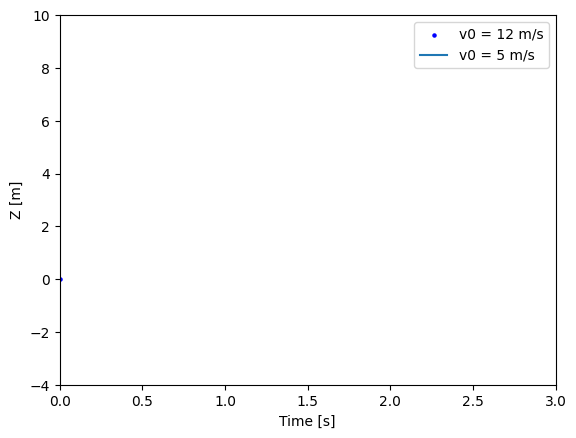

In [48]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()